# Run SISEPUEDE for Uganda in this Notebook

Use this notebook to:
- Build input data using best available pipeline data + overwrites from Uganda-specific sources
- Run the model to verify if works
- Do some quick checks

In [1]:
# can comment out warnings.filterwarnings if you want to see warnings
import warnings
warnings.filterwarnings("ignore")


import importlib
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import pathlib
import sisepuede.core.attribute_table as att
import sisepuede.core.support_classes as sc
import sisepuede.manager.sisepuede_file_structure as sfs
import sisepuede.manager.sisepuede_models as sm
import sisepuede.utilities._toolbox as sf
import utils.common_data_needs as cdn
import time
from typing import *

plt.style.use("dark_background", )



[juliapkg] Found dependencies: /opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/julia/pyjuliapkg/juliapkg.json
[juliapkg] Found dependencies: /opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/juliacall/juliapkg.json
[juliapkg] Locating Julia ^1.11.5
[juliapkg] Installing Julia 1.11.6 using JuliaUp
[juliapkg] Using Julia 1.11.5 at /Users/usuario/.juliaup/bin/julia
[juliapkg] Using Julia project at /opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/julia
[juliapkg] Installing packages:
           julia> import Pkg
           julia> Pkg.Registry.update()
           julia> Pkg.add([Pkg.PackageSpec(name="Cbc", uuid="9961bab8-2fa3-5c5a-9d89-47fab24efd76"), Pkg.PackageSpec(name="Clp", uuid="e2554f3b-3117-50c0-817c-e040a3ddf72d"), Pkg.PackageSpec(name="DataFrames", uuid="a93c6f00-e57d-5684-b7b6-d8193f3e46c0"), Pkg.PackageSpec(name="

The latest version of Julia in the `release` channel is 1.11.6+0.aarch64.apple.darwin14. You currently have `1.11.5+0.aarch64.apple.darwin14` installed. Run:

  juliaup update

in your terminal shell to install Julia 1.11.6+0.aarch64.apple.darwin14 and update the `release` channel to that version.
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `/opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/julia/Project.toml`
  [9961bab8] + Cbc v1.2.0
  [e2554f3b] + Clp v1.2.2
  [a93c6f00] + DataFrames v1.7.0
  [60bf3e95] + GLPK v1.2.1
  [87dc4568] + HiGHS v1.18.2
  [b6b21f68] + Ipopt v1.10.6
  [4076af6c] + JuMP v1.27.0
  [a3c327a0] + NemoMod v2.0.0 `https://github.com/sei-international/NemoMod.jl.git#61e63e0`
⌅ [6099a3de] + PythonCall v0.9.22
  [0aa819cd] + SQLite v1.6.1
    Updating `/opt/miniconda3/envs/sisepuede/lib/python3.11/site-packages/sisepuede/julia/Manifest.toml`
  [6e4b80f9] + BenchmarkTools v1.6.0
  [9961ba

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


Precompiling NemoMod...
Info Given NemoMod was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
   1187.2 ms  ? NemoMod
[ Info: Precompiling NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72] 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
┌ Info: Skipping precompilation due to precompilable error. Importing NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72].
└   exception = Error when precompiling module, potentially caused by a __precompile__(false) declaration in the module.


In [2]:
importlib.reload(cdn)
dict_ssp = cdn._setup_sisepuede_elements()

matt = dict_ssp.get("model_attributes", )
models = dict_ssp.get("models", )
regions = dict_ssp.get("regions", )
time_periods = dict_ssp.get("time_periods", )

# setup region
_REGION_NAME = "uganda"
_REGION_ISO = regions.return_region_or_iso(_REGION_NAME, return_type = "iso")



In [3]:
#matt.get_dimensional_attribute_table(time_periods.field_time_period)
#importlib.reload(cdn)
importlib.reload(cdn)


<module 'utils.common_data_needs' from '/Users/usuario/git/ssp_uganda_data/utils/common_data_needs.py'>

In [ ]:
df_tmp = cdn._build_from_outputs(
    (2015, 2070),
    fns_exclude = ["frac_lndu_initial.csv"],
    merge_type = "outer", 
    print_info = True,
    stop_on_error = True, 
)



## Call _build_from_outputs() to build data using CSVs in `cdn._PATH_OUTPUTS`


In [2]:
cdn._PATH_OUTPUTS

PosixPath('/Users/usuario/git/ssp_uganda_data/output_data')

In [7]:
importlib.reload(cdn)
df_tmp = cdn._build_from_outputs(
    (
        min(time_periods.all_years),
        max(time_periods.all_years)
    ),
    fns_exclude = ["frac_lndu_initial.csv"],
    merge_type = "outer", 
    print_info = False,
    stop_on_error = True, 
)



In [130]:
# modvar_exports = matt.get_variable(models.model_enercons.modvar_enfu_exports_fuel)
# modvar_import_frac = matt.get_variable(models.model_enercons.modvar_enfu_frac_fuel_demand_imported)


##  Do a crude timed run
- Verify no errors
- Lets us do some quick exploration

In [11]:
t0 = time.time()

df_run = models.project(df_tmp, )     ##  RUN SISEPUEDE HERE

t_elapse = sf.get_time_elapsed(t0) 

print(f"Time to run: {t_elapse} seconds")

2025-19-Jul 01:27:19.849 Opened SQLite database at /Users/usuario/git/ssp_uganda_data/tmpm2jmse2e.sqlite.
2025-19-Jul 01:27:19.996 Added NEMO structure to SQLite database at /Users/usuario/git/ssp_uganda_data/tmpm2jmse2e.sqlite.
2025-19-Jul 01:27:27.469 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112


2025-19-Jul 01:27:54.555 Finished modeling scenario.
Time to run: 35.73 seconds


<Axes: >

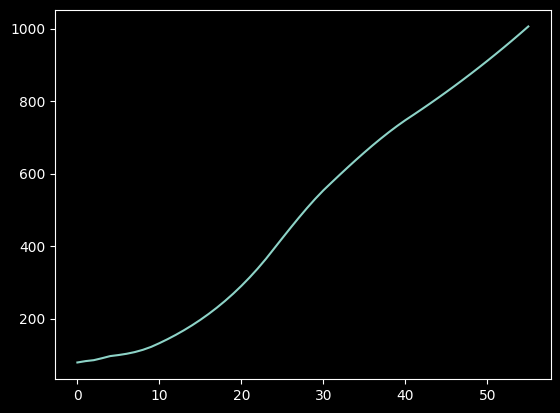

In [12]:
df_tmp["gdp_mmm_usd"].plot()

## Plot emissions stack for quick gut check

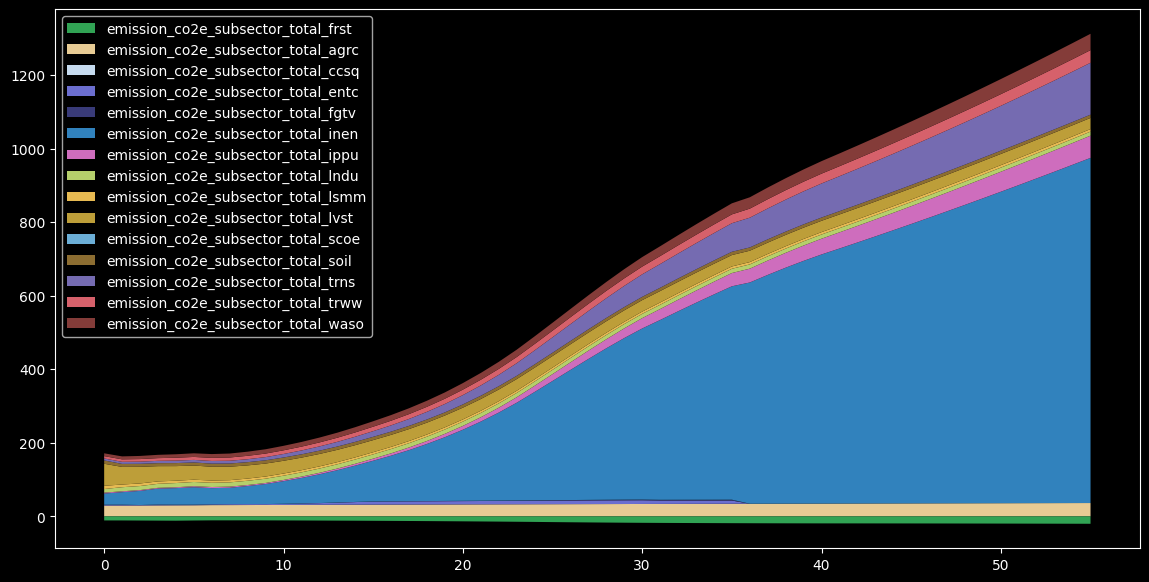

In [13]:
import sisepuede.plotting.plots as spp

fig, ax = plt.subplots(figsize = (14, 7))

spp.plot_emissions_stack(
    df_run,
    matt,
    figtuple = (fig, ax), 
)

ax.legend()



In [ ]:
[x for x in df_run.columns if ("emission_co2e_" in x) and ("scoe" in x)]
df_run[["emission_co2e_co2_scoe_residential"]]

<Axes: xlabel='year'>

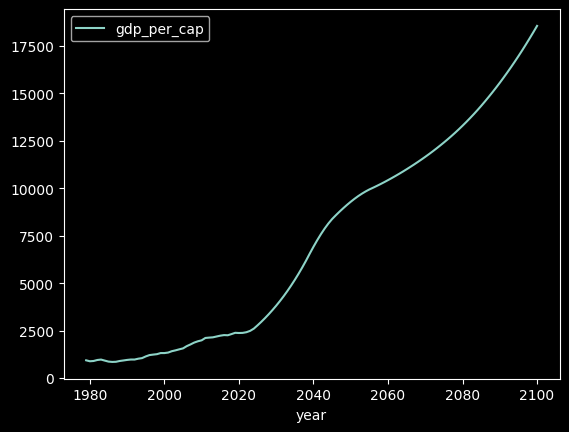

In [145]:
_FIELD_GDP_CAP = "gdp_per_cap"
_FIELD_POP = "population"



df_gdp = pd.read_csv(cdn._PATH_OUTPUTS.joinpath("GDP.csv"))
df_pop = pd.read_csv(cdn._PATH_OUTPUTS.joinpath("POPULATION.csv"))

df_pop[_FIELD_POP] = df_pop[["population_gnrl_rural", "population_gnrl_urban"]].sum(axis = 1, )

df_compare = pd.merge(
    df_gdp,
    df_pop,
    how = "inner",
)


# CWATM @ IIASA (community water model)

df_compare[_FIELD_GDP_CAP] = (10**9)*df_compare["gdp_mmm_usd"].to_numpy()/df_compare[_FIELD_POP].to_numpy()
df_compare[[time_periods.field_year, _FIELD_GDP_CAP]].plot(x = time_periods.field_year, )



In [ ]:
df_uganda = cdn.

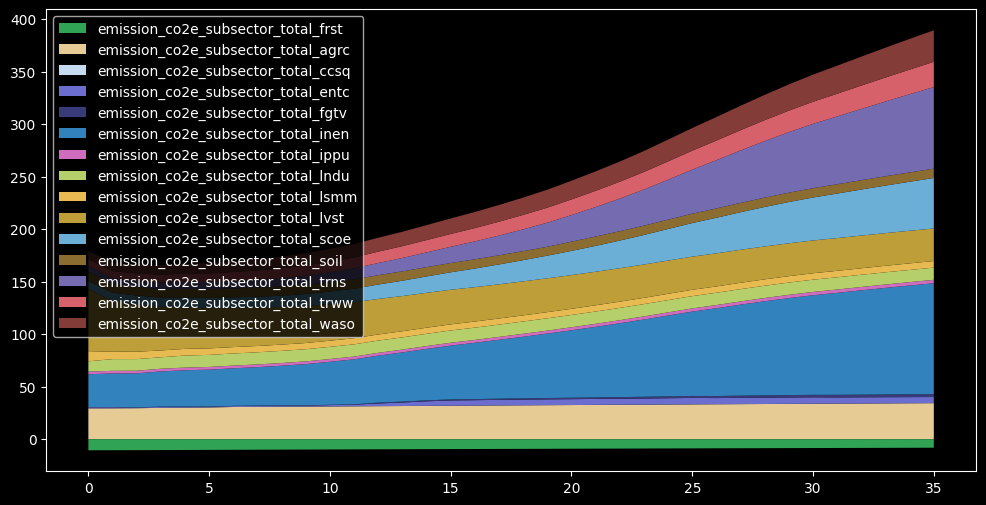

In [143]:
import sisepuede.plotting.plots as spp

fig, ax = plt.subplots(figsize = (12, 6))

spp.plot_emissions_stack(
    df_uganda,
    matt,
    figtuple = (fig, ax), 
)

ax.legend()